## Šestkotna mreža

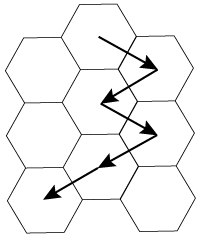

V domači nalogi hodimo po pravokotni mreži. V izzivu bomo po hodili šestkotni. Možne smeri so n, ne, se, s, sw, nw. Slika kaže pot "se,sw,se,sw,sw". Ko prehodimo to pot, smo v resnici le tri korake od izhodišča (na primer: s, s, sw).

Koliko korakov od izhodišča smo, ko prehodimo pot v datoteki?


V domači nalogi hodimo po pravokotni mreži. V izzivu bomo po hodili šestkotni. Možne smeri so n, ne, se, s, sw, nw. Slika kaže pot "se,sw,se,sw,sw". Ko prehodimo to pot, smo v resnici le tri korake od izhodišča (na primer: s, s, sw).

Koliko korakov od izhodišča smo, ko prehodimo pot v datoteki?

(Pravilni odgovor je sestavljen iz treh zaporednih števk v napačnem vrstnem redu.)

### Rešitev

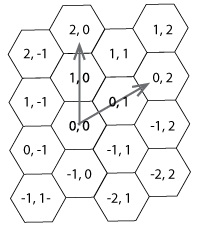

Izziv je bil zanimiv predvsem zato, ker je bil bistveno lažji od domače naloge. :)

Finta je edinole v tem, da si moramo izmisliti šestkotni koordinatni sistem. Lahko je, recimo, tak kot na sliki.

Odtod naprej gre kot v domači nalogi: beremo korake in hodimo po mreži.

In [1]:
directions = {"n": (1, 0), "ne": (0, 1), "se": (-1, 1),
              "s": (-1, 0), "sw": (0, -1), "nw": (1, -1)}

x, y = 0, 0
for step in open("pot.txt").read().strip().split(","):
    dx, dy = directions[step]
    x += dx
    y += dy
    
print(x, y)

213 462


Zdaj vemo, kje končamo. Tu pa postanejo stvari zabavne. Ko sem nalogo reševal sam, sem jo rešil narobe: preprosto seštel sem absolutni vrednosti obeh števil. To je pravilno, če končam kje v prvem ali tretjem kvadrantu, se pravi zgoraj desno ali spodaj levo. V tem primeru se moram namreč zapeljati najprej po eni (sever-jug), potem po drugi osi (jugozahod-severovzhod).

Če končamo v drugem ali tretjem kvadrantu, pa imamo na voljo še bližnjico, os severozahod-jugovzhod. Ta "popravlja" obe koordinati hkrati. Najkrajša pot v tem primeru torej vodi tako, da se premaknem v smeri `se` ali `nw` tolikokrat, kolikor je velika manjša od koordinat končne celice. Po tem se bom znašel na eni od osi - bodisi navpični bodisi poševni. Potem se bom moral zapeljati še po tej osi. No, če k minimumu dveh števil prištejem razliko med njima, potem dobim maksimum teh dveh stvari. Število potrebnih korakov torej izračunamo tako:

In [2]:
if x * y > 0:  # oba sta pozitivna ali oba negativna
    korakov = abs(x) + abs(y)
else:
    korakov = max(abs(x), abs(y))

Mislim, da je zdaj pravilno. In kar zanimivo, ne?

Da bomo kljub relativno preprosti nalogi naredili nekaj zabavnega in spoznali nekaj novega: Python ima vdelana tudi kompleksna števila, le da namesto (bolj matematičnega) `i` uporablja (bolj inženirski) `j`. Z njimi lahko obe koordinati shranimo v eno samo spremenljivko.

In [3]:
directions = {"n": 1, "ne": 1j, "se": -1 + 1j, "s": -1, "sw": -1j, "nw": 1 - 1j}

coord = 0
for step in open("pot.txt").read().strip().split(","):
    coord += directions[step]
    
print(coord)

(213+462j)


Ob tem, kar se bomo učili danes, bi bil greh, če programa ne bi skrajšali v

In [4]:
directions = {"n": 1, "ne": 1j, "se": -1 + 1j, "s": -1, "sw": -1j, "nw": 1 - 1j}

sum(directions[step] for step in open("pot.txt").read().strip().split(","))

(213+462j)

### Hitrejše štetje

Ob pregledovanju študentskih rešitev sem opazil eno, ki bi mi morala priti na misel - a mi ni.

Očitno je vrstni red korakov nepomemben, torej lahko kar z `collections.Counter` preštejemo, kolikokrat smo šli kam. Potem pa poračunamo razdalje.

In [5]:
from collections import Counter

koraki = Counter(open("pot.txt").read().strip().split(","))
koraki

Counter({'se': 1366, 'sw': 1059, 's': 1396, 'nw': 1272, 'ne': 1427, 'n': 1703})

In [6]:
korakov = abs(koraki["n"] - koraki["s"] - koraki["se"] + koraki["nw"]) \
        + abs(koraki["ne"] - koraki["sw"] + koraki["se"] - koraki["nw"])

korakov

675

Kako pridemo do zadnje formule? Spomnimo se slovarja `{"n": (1, 0), "ne": (0, 1), "se": (-1, 1), "s": (-1, 0), "sw": (0, -1), "nw": (1, -1)}` ter seštevamo prve komponente in druge komponente.